<a href="https://colab.research.google.com/github/sofyadmitrieva/python-ML-basics/blob/main/visuals_hw_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическое задание

## ЗАДАНИЕ 1: Базовые графики matplotlib

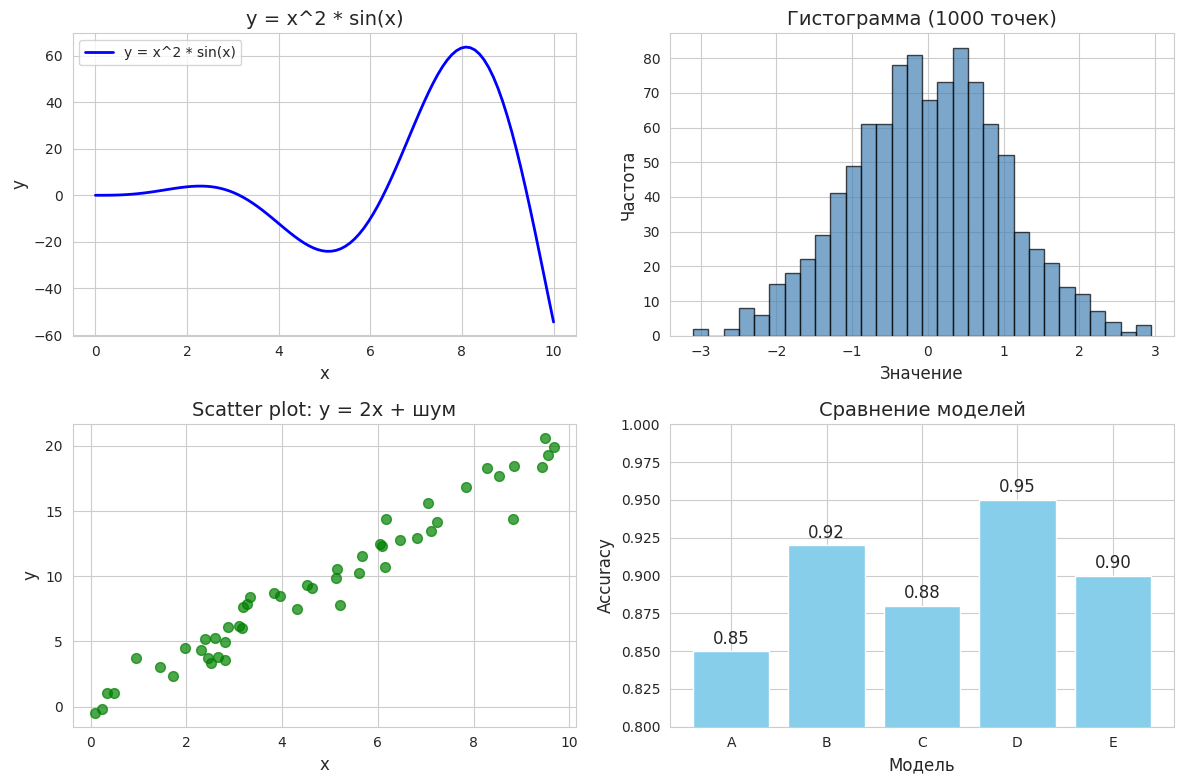

In [ ]:
# Создайте фигуру с 4 subplots (2x2):
# 1. Линейный график функции y = x^2 * sin(x) на интервале [0, 10]
#    Добавьте заголовок, подписи осей, сетку, легенду
# 2. Гистограмма 1000 случайных точек из нормального распределения
#    Настройте количество bins=30, добавьте заголовок
# 3. Scatter plot: 50 точек (x - равномерное распределение, y = 2x + шум)
#    Настройте размер точек, прозрачность, цвет
# 4. Bar chart: сравнение 5 разных моделей по точности
#    accuracy = [0.85, 0.92, 0.88, 0.95, 0.90]
#    Добавьте значения над столбцами

# Установка необходимых библиотек
!pip install matplotlib seaborn -q

# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля seaborn для более приятных графиков по умолчанию
sns.set_style("whitegrid")

# Настройка отображения графиков внутри ноутбука
%matplotlib inline

# Настройка размеров шрифтов для лучшей читаемости
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10
})

# Создаем фигуру с 4 subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1. Линейный график y = x^2 * sin(x)
ax = axes[0, 0]
x = np.linspace(0, 10, 100)
y = x**2 * np.sin(x)
ax.plot(x, y, 'b-', label='y = x^2 * sin(x)', linewidth=2)
ax.set_title("y = x^2 * sin(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True)
ax.legend()


# 2. Гистограмма нормального распределения
ax = axes[0, 1]
data = np.random.normal(0, 1, 1000)
ax.hist(data, bins=30, edgecolor='black', color='steelblue', alpha=0.7)
ax.set_title("Гистограмма (1000 точек)")
ax.set_xlabel("Значение")
ax.set_ylabel("Частота")
ax.grid(True)

# 3. Scatter plot: y = 2x + шум
ax = axes[1, 0]
x = np.random.uniform(0, 10, 50)
y = 2 * x + np.random.normal(0, 1, 50)
ax.scatter(x, y, s=50, alpha=0.7, linewidth=1, color="green", edgecolors='green')
ax.set_title("Scatter plot: y = 2x + шум")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True)

# 4. Bar chart: точность моделей
ax = axes[1, 1]
models = ['A', 'B', 'C', 'D', 'E']
accuracy = [0.85, 0.92, 0.88, 0.95, 0.90]
bars = ax.bar(models, accuracy, linewidth=1, color="skyblue")
ax.set_title("Сравнение моделей")
ax.set_xlabel("Модель")
ax.set_ylabel("Accuracy")
ax.set_ylim(0.8, 1.0)
ax.grid(True)

# Добавляем значения над столбцами
for bar, acc in zip(bars, accuracy):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{acc:.2f}', ha='center')

plt.tight_layout()
plt.show()

## ЗАДАНИЕ 2: Seaborn визуализации

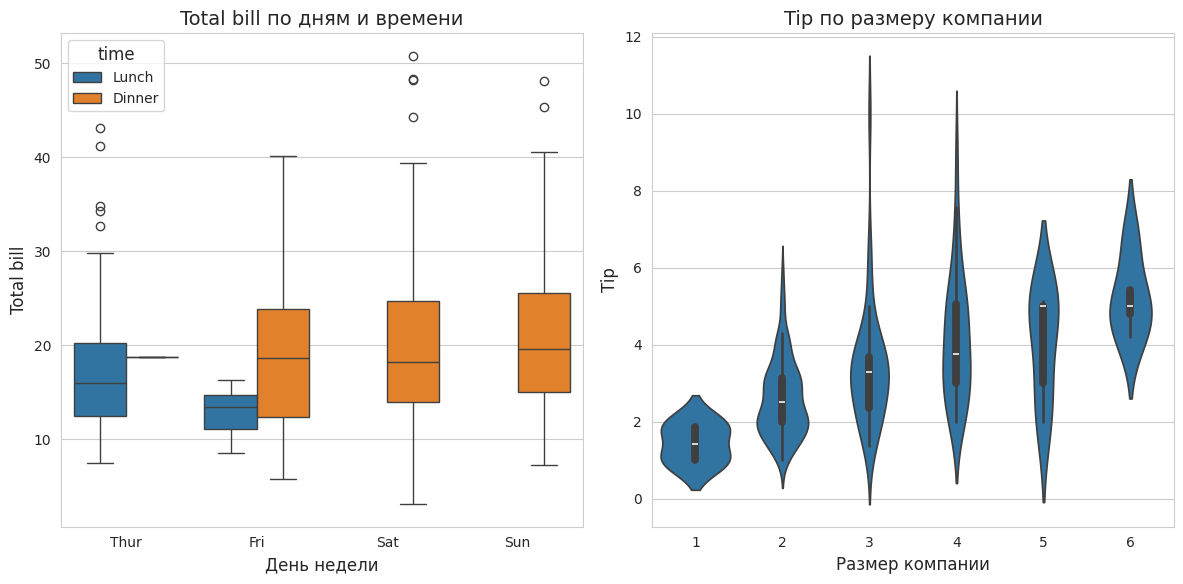

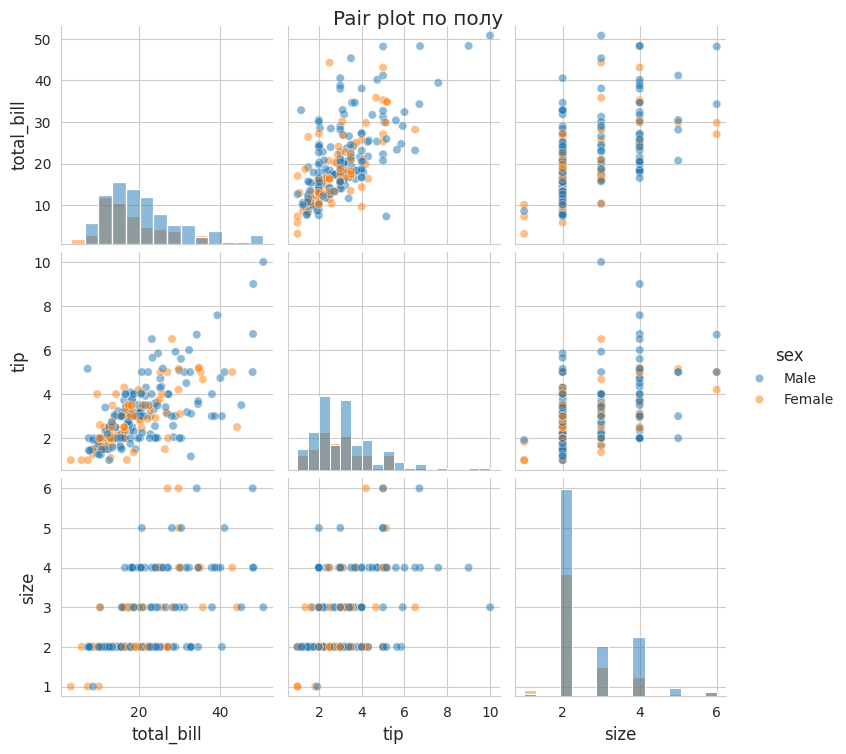

In [ ]:
# Используйте датасет tips из seaborn:
# import seaborn as sns
# tips = sns.load_dataset('tips')

# Создайте 3 графика:
# 1. Box plot: total_bill по дням недели (day)
#    Разделите дополнительно по времени (time) с помощью hue
# 2. Violin plot: tip в зависимости от размера компании (size)
# 3. Pair plot: выберите 4 числовых признака, раскрасьте по полу (sex)

import seaborn as sns
import matplotlib.pyplot as plt

# Загружаем датасет
tips = sns.load_dataset('tips')

# Создаем фигуру для графиков
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 1. Box plot: total_bill по дням с разделением по времени
# data=tips, x='day', y='total_bill', hue='time'
sns.boxplot(ax=axes[0], data=tips, x='day', y='total_bill', hue='time')
axes[0].set_title("Total bill по дням и времени")
axes[0].set_xlabel("День недели")
axes[0].set_ylabel("Total bill")

# 2. Violin plot: tip по размеру компании
# x='size', y='tip'
sns.violinplot(ax=axes[1], data=tips, x='size', y='tip')
axes[1].set_title("Tip по размеру компании")
axes[1].set_xlabel("Размер компании")
axes[1].set_ylabel("Tip")

plt.tight_layout()
plt.show()

# 3. Pair plot: 4 числовых признака, раскраска по полу
# tips[['total_bill', 'tip', 'size', 'sex']]
# Создаем отдельную фигуру для pair plot

sns.pairplot(tips[['total_bill', 'tip', 'size', 'sex']],
             hue='sex', diag_kind='hist', plot_kws={'alpha': 0.5})

plt.suptitle('Pair plot по полу', y=1)

plt.show()